# Homework 6
Donghao Li 20653877
## Problem 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
face=sio.loadmat("face.mat")
face["id"]=face["id"].reshape(-1)

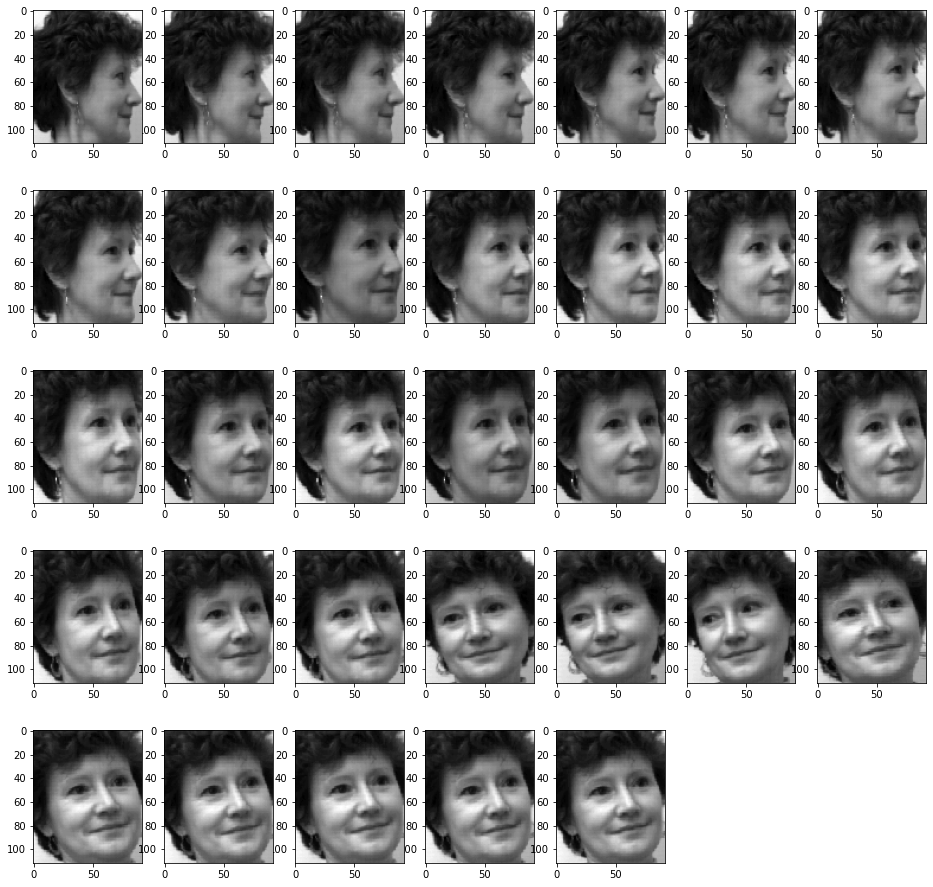

In [6]:
plt.figure(figsize=(16,16))
for i in range(33):
    # print(i,int(face['id'][i]) )
    plt.subplot(5,7,int(face['id'][i]) )
    plt.imshow(face['Y'][:,:,i],cmap=plt.cm.gray)

plt.show()


In [17]:
from matplotlib import offsetbox
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(12,12))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(face['Y'][:,:,i], zoom=0.3,cmap=plt.cm.gray),
                X[i])
            ax.add_artist(imagebox)
    # plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [18]:
images=face['Y'].reshape(-1,33).transpose()
y=face['id']

Computing MDS projection
Done.


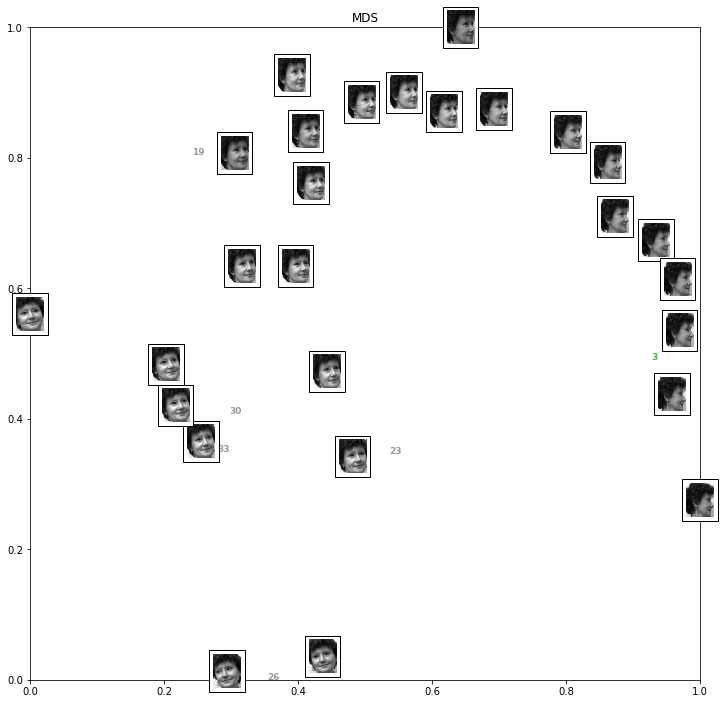

In [19]:

print("Computing MDS projection")
# t0 = time()
images_mds = manifold.MDS( n_components=2
                        ).fit_transform(images)
print("Done.")
plot_embedding(images_mds,"MDS")

In [20]:
# Isomap projection of the digits dataset
print("Computing Isomap projection")
# t0 = time()
images_iso = manifold.Isomap(n_neighbors=5, n_components=2
                        ).fit_transform(images)
print("Done.")
plot_embedding(images_iso,"ISOMAP k=5")

Computing Isomap projection
Done.


Computing LLE projection
Done.


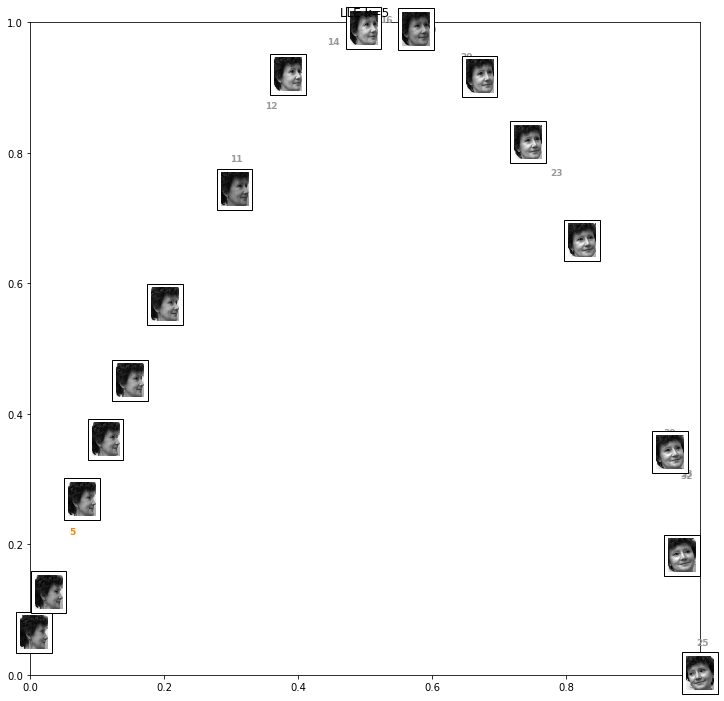

In [21]:

print("Computing LLE projection")
# t0 = time()
images_lle = manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=2
                        ).fit_transform(images)
print("Done.")
plot_embedding(images_lle,"LLE k=5")

The face data contrain 33 faces of a same perseon with different perspective. By using different manifold leanring graph, we can reduce the dimension to 2 while keeping enough imformation of perspective. I think LLE with 5 neighbers is best since it make all the faces lie in a one-dimension curve.



# Problem 2 


## cluster

Eight cluster of data in three dimensional space. Successful diemnsion reduction method should keep the cluster relationship and also the line between the clusters (Blue points). In this case we find that LLE, Hessian LLE,Laplacian LLE and LTSA fails in this case. 
![title](img/cluster.png)

## corner dataset
Good method should unfold the corner with little distortion. So MDS, ISOMAP diffusion map and LTSA is good in this case
![title](img/corner.png)

## disk
In this dist.  MDS, LLE totally failed due to complexity. Laplacian also fails to give reasonable results.
![title](img/disk.png)


## gaussian
In this dist, data follows a guassian distribution. MDS, ISOMAP Diffusion map and LTSA are good in this case. However, LLE and Hessian LLE totally failed due to complexity. 


![title](img/gaussian.png)


## helix 
When dealing with helix dataset, ISOMAP and LTSA successfully recover the one dimensional curve.
![title](img/helix.png)


# swiss roll with hole

When add a hole to the swiss roll data, many of the algorthm fails and only LTSA successfully unroll it.

![title](img/hole.png)


## punctured
When the data not uniformly distributed, only LLE and LTSA recover the manifold successfully.
![title](img/punctured.png)

# Swiss roll
Only ISOMAP and LTSA successuly unroll it. 
![title](img/roll.png)


## twin peek
On this data only IOSMAP and LTSA successfully recover the manifold.
![title](img/twin.png)

## Overall performance

Among all the algorithms, I think LTSA is the best one since it works in most cases. Other methods do not work on some cases. LLE Hessian LLE and Laplacian can be too complicated to solve some problems. MDS and PCA can be too simple to explore manifold of data.  In practice, I will first try PCA or MDS since they are very fast and serves as a baseline. Then I will use LTSA. 

## Problem 3
Problem 3 (a)
$$K=\begin{bmatrix}
      x_1 \\
      x_2
    \end{bmatrix}\begin{bmatrix}
   x_1^T & x_2^T\end{bmatrix} = \begin{bmatrix}
      x_1x_1^T & x_1x_2^T \\
      x_2x_1^T & x_2x_2^T 
    \end{bmatrix}$$
Then we have:
$$
x_1x_1^T=A=u_k\Lambda u^T
$$

which implies:

$$
x_1=u_k\Lambda_k^{1/2}
$$
For $x_2$, we have:
$$
x_2x_1^T=B^T
$$
Then we get:
$$
x_2=B^T u_k\Lambda_k^{-1/2}
$$


$$
  \begin{matrix}
   1 & 2 & 3 \\
   4 & 5 & 6 \\
   7 & 8 & 9
  \end{matrix} \tag{1}
$$

Problem 3 (b)
$$
C=x_2x_2^T=(B^T u_k\Lambda_k^{-1/2}) (B^T u_k\Lambda_k^{-1/2})^T=B^Tu_k\Lambda^{-1}Tu_k^TB=B^TA^\dagger B
$$